- Clustering 알고리즘 (대표적인 3가지 분류)
    - K-means Clustering 
    - Gaussian Mixture : 각 클러스터가 정규분포를 따르도록 클러스터링 한다!
    - Hierarchical Clustering, DBSCAN, HDBSCAN
    
-> 각각의 알고리즘을 적절하게 혼합해서 사용하는 것이 중요함

In [3]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=1) 

In [ ]:
####################################################
# Kmeans Clustering
####################################################

In [6]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(X)
print(f.labels_)
print(f.cluster_centers_)
print(f.inertia_) # 데이터가 모여있는 정도, clustering이 잘 되었는지 평가 지표
pd.crosstab(f.labels_,Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
78.85144142614601


C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [7]:
# determine the number of clusters
inertia_list = []
for k in range(2,30):
    f = KMeans(n_clusters=k)
    f.fit(X)
    inertia_list.append(f.inertia_)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.p

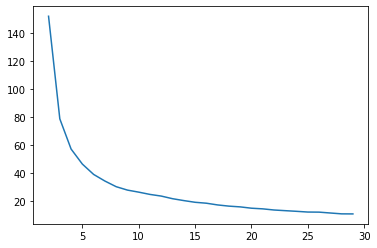

In [8]:
plt.plot(np.arange(2,30),inertia_list)

In [9]:
f = KMeans(n_clusters=5)
f.fit(X)
pd.crosstab(f.labels_,Y)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,25,13
2,0,0,12
3,0,25,1
4,0,0,24


In [10]:
# after scaling & PCA
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [12]:
f = KMeans(n_clusters=3)
f.fit(X_s)
pd.crosstab(f.labels_,Y)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [ ]:
# from sklearn.decomposition import PCA # 차원 축소 -> 속도 향상
# f = PCA()
# f.fit(X_s)
# X_st = f.transform(X_s)


In [ ]:
# # using the first component
# from sklearn.decomposition import PCA
# f = PCA(n_components=1)
# f.fit(X_s)
# X_st = f.transform(X_s)

In [ ]:
# f = KMeans(n_clusters=3)
# f.fit(X_st)
# pd.crosstab(f.labels_,Y)

In [ ]:
####################################################
# Kmeans Clustering with Train/Test
####################################################

In [13]:
# kmeans
from sklearn.cluster import KMeans
f = KMeans(n_clusters=3)
f.fit(xtrain)
f.labels_
pd.crosstab(f.labels_,ytrain)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,0,2,25
1,33,0,0
2,0,29,11


In [14]:
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)
# 경향성이 비슷한 것을 확인! -> 학습 set의 모델이 학습 set의 분포를 잘 따랐다.

col_0,0,1,2
row_0,,,
0,0,1,11
1,17,0,0
2,0,18,3


In [ ]:
####################################################
# Gaussian Mixture
####################################################

- 각 cluster가 gaussian분포를 따르도록 클러스터링하는 기법

In [15]:
# 각각의 cluster들이 가우시안분포(정규분포)를 따르고 있다.
from sklearn.mixture import GaussianMixture 
f = GaussianMixture(n_components=3)
f.fit(X)
print(f.means_)
print(f.covariances_)


[[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
[[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
yhat = f.predict(X)
pd.crosstab(yhat,Y)

col_0,0,1,2
row_0,,,
0,0,5,50
1,50,0,0
2,0,45,0


In [17]:
# after scaling
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(X)
X_s = f.transform(X)

In [18]:
f = GaussianMixture(n_components=3)
f.fit(X_s)
pd.crosstab(f.predict(X_s),Y)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,0,5,50
1,50,0,0
2,0,45,0


In [19]:
# KMeans with scaling
f = KMeans(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)
f.fit(X_s)
pd.crosstab(f.labels_,Y)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1,2
row_0,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [ ]:
####################################################
# Hierachical Clustering
####################################################

In [20]:
from sklearn.cluster import AgglomerativeClustering
f = AgglomerativeClustering(n_clusters=3)
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [21]:
# different options
f = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
# affinity : 유사도, linkage : 하나하나는 무조건 연결이 되어야 한다.
f.fit(X)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,50,24
2,0,0,26


In [ ]:
####################################################
# DBSCAN
####################################################

In [22]:
from sklearn.cluster import DBSCAN
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X)
f.labels_
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,1,6,10
0,49,0,0
1,0,44,40


In [23]:
# using the first two components
from sklearn.decomposition import PCA
f = PCA(n_components=2)
f.fit(X_s)
X_st = f.transform(X_s)

In [24]:
f = DBSCAN(eps=0.5,min_samples=5)
f.fit(X_st)
pd.crosstab(f.labels_,Y)

col_0,0,1,2
row_0,,,
-1,2,3,7
0,48,0,0
1,0,47,43


In [25]:
col_list = ['k','b','r','g','y']
col = []
for i in range(len(f.labels_)):
    col.append(col_list[f.labels_[i]+1])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

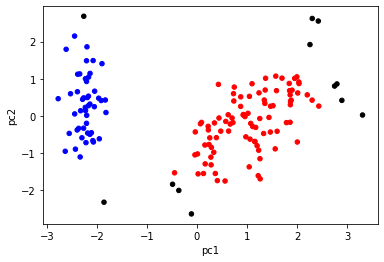

In [26]:
d = pd.DataFrame(X_st)
d.columns = ['pc1','pc2']
d.plot('pc1','pc2','scatter',c=col)

In [ ]:
####################################################
# Clustering Practices
####################################################

In [ ]:
# clustering boston data set only with X
# which method and how many cluster will you use?
# can you find the relation between the cluster and medv? 

In [27]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/flowertoman/data/main/data01_boston.csv')
X = df.iloc[:,:-1]
Y = df['medv']